# Import Libraries

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset 

In [4]:
tweet_df=pd.read_csv('C:/Users/SHARON/Downloads/twitter_sentiment.csv', header=None, index_col=[0])
tweet_df = tweet_df[[2, 3]].reset_index(drop=True)
tweet_df.columns = ['sentiment', 'text']
tweet_df.head() 

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


# Data cleaning

In [6]:
tweet_df.info()

tweet_df.isnull().sum()

tweet_df.dropna(inplace=True)

tweet_df = tweet_df[tweet_df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
tweet_df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

# Downloading NLTK Stopwords and Punkt Tokenizer

In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHARON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHARON\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Cleaning and Preprocessing Text Data for NLP

In [11]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    # Remove retweet tags (RT)
    text = re.sub(r'^RT[\s]+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W+', ' ', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming 
    cleaned_text = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return ' '.join(cleaned_text)

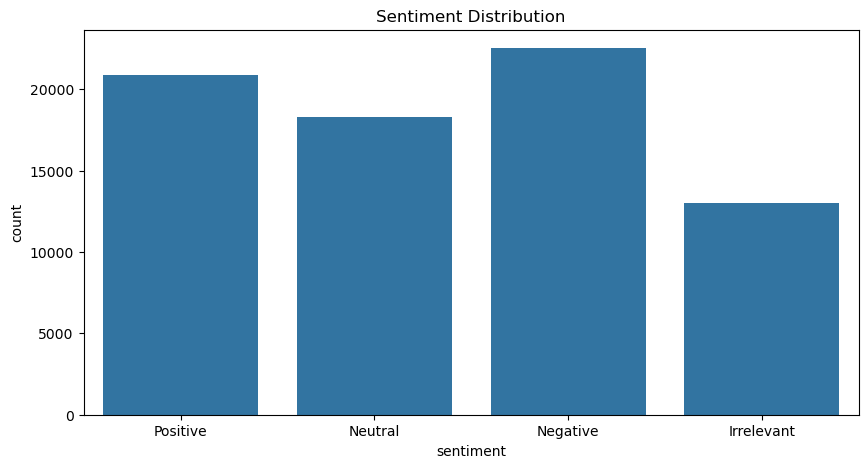

In [12]:
# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=tweet_df)
plt.title('Sentiment Distribution')
plt.show()

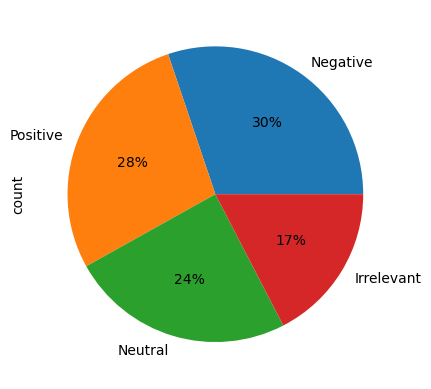

In [13]:
tweet_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

# Visualizing Sentiment Analysis with Word Clouds

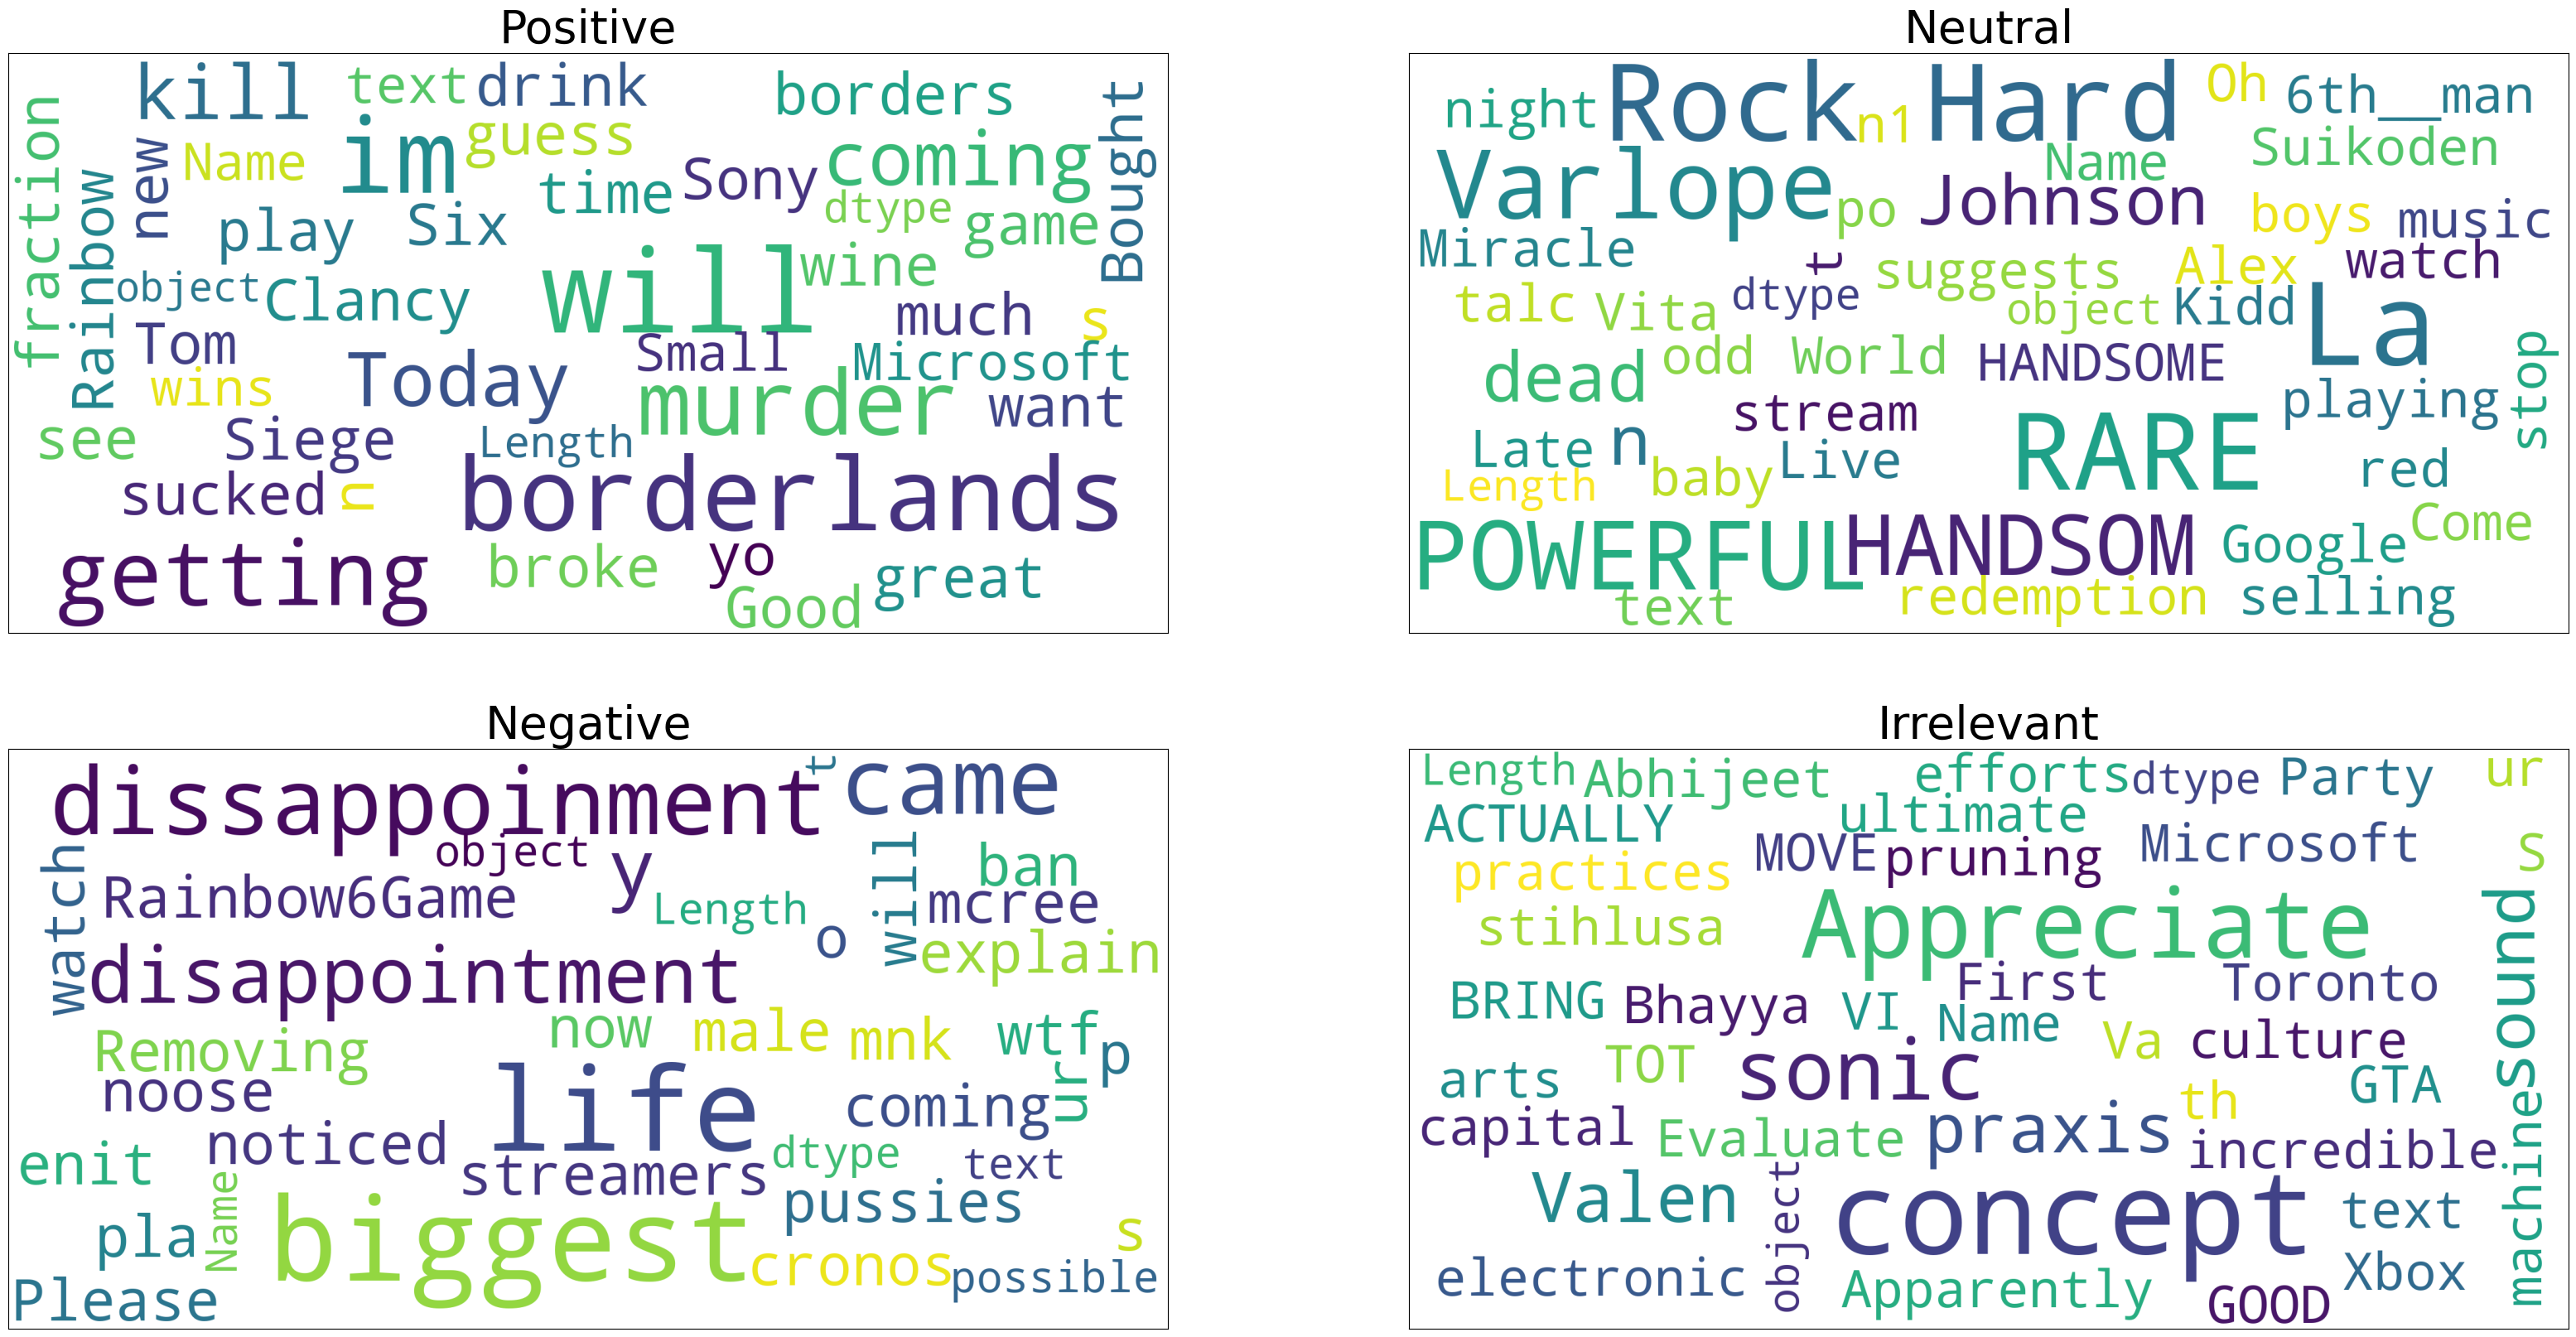

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(40,20))

for index, col in enumerate(tweet_df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    tweet_df1 = tweet_df[tweet_df['sentiment']==col]
    data = tweet_df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

# Splitting data into Train and Test sets

In [17]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(tweet_df['text'], tweet_df['sentiment'], test_size=0.25, random_state=42)

In [18]:
X_train.shape, X_test.shape

((55985,), (18662,))

# Building and Evaluating a Text Classification Model with Random Forest

In [20]:
nltk.download('stopwords')

stopwords_list = nltk_stopwords.words('english')

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_list)),('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHARON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0.9169435215946844


In [21]:
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [22]:
X_test.tolist()[:20]

["Add 4 @ CallofDuty and in @ RogueCompany Now teams. O and everyone plays under @ play _ pso2 or @ GhostRecon. I am also one of the BEST Grovers in @ PaladinsGame and BEST Junkrat or McCree in @ overwatchleague. Don't forget BEST Vulcan in @ SMITEGame. I play @ DestinyTheGame and @ FortniteGame.",
 '@TMobile... you guys kids are really very slow in Tuba Star city. Az. Makes people go to Google Verizon.',
 'I will make Google top ranking high quality SEO backlinks. Fiverr.com / share / NWeWvp..',
 'I know a guy who’s tablet crashes today after 10 years. He tried to fix it without google videos and plugging the tv into a different outlet. No luck.',
 '@ EAMaddenNFL movement is incredible.',
 '. Internship manager.',
 'BGs – NOT IN FIRST! by Hearthstone\xa0Battlegrounds gameforce.jp/hearthstone%e3…',
 'Almost 2 years after launch and 3 cancelled season later BFV still now have game same in MP even though it’s fully functional in Ghost Campaign... touche beyond every wire putting one nail